#import Libraries


In [121]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.layers import Convolution2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import metrics




path of Datasets

In [7]:
train_loc = 'C:/Users/Hesham/Desktop/data divided/train'
test_loc = 'C:/Users/Hesham/Desktop/data divided/test'
val_loc = 'C:/Users/Hesham/Desktop/data divided/val'

resize image and Data Agumentions

In [13]:
#trdata = train_data
#tsdata = test_data
#batch_size = 32 .. take 32 img from train data Then go back and forth , and each of epoch take iteration (to update width, loss fun, acc)

trdataGen = ImageDataGenerator(
                            rescale = 1./255, #To rescaling the image in range of [0,1] (Normalization)
                            shear_range = 0.2, # To randomly shear the images
                            zoom_range = 0.2,  #To randomly zoom the images
                            rotation_range=30, #Rotate images by 30 degrees
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip = True #for randomly flipping half of the images horizontally 
                                                   )

traindata = trdata.flow_from_directory(directory = train_loc, target_size = (224,224), batch_size=32)

valdatadGen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
testdataGen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

test_batches = valdatadGen.flow_from_directory(test_loc, target_size=(224, 224), batch_size=32)

val_batches = testdataGen.flow_from_directory(val_loc, target_size=(224, 224), batch_size=32)

Found 10874 images belonging to 6 classes.
Found 1369 images belonging to 6 classes.
Found 1356 images belonging to 6 classes.


In [14]:
traindata.class_indices

{'freshapples': 0,
 'freshbanana': 1,
 'freshoranges': 2,
 'rottenapples': 3,
 'rottenbanana': 4,
 'rottenoranges': 5}

In [15]:
X_train, y_train = next(traindata)
X_test, y_test = next(test_batches)
X_val, y_val = next(val_batches)

display images

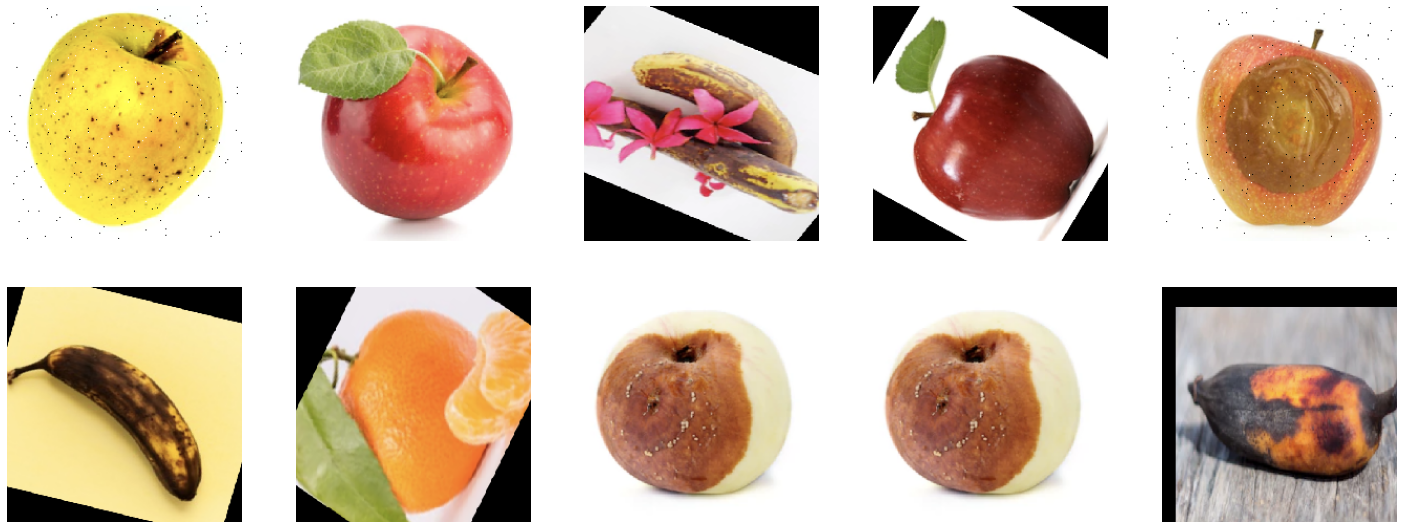

In [21]:
plt.figure(figsize=(25, 25))
for n, i in enumerate(np.random.randint(0, len(X_test), 10)):
    plt.subplot(5, 5, n+1)
    plt.imshow((X_test[i]))
    plt.xlabel(traindata[np.argmax(y_test[i])])
    plt.axis('off')

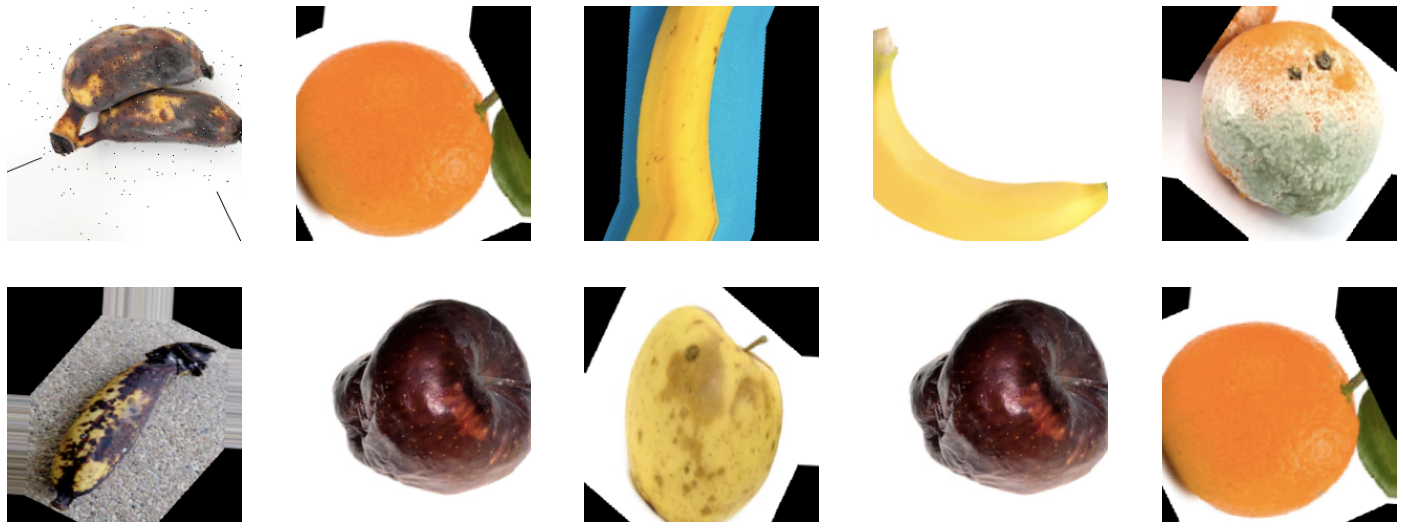

In [32]:
plt.figure(figsize=(25, 25))
for n, i in enumerate(np.random.randint(0, len(X_train), 10)):
    plt.subplot(5, 5, n+1)
    plt.imshow((X_train[i]))
    plt.xlabel(traindata[np.argmax(y_train[i])])
    plt.axis('off')

building CNN

In [43]:
#Initializing CNN
classifier = Sequential()

#adding 1st Convolution layer and Pooling layer
classifier.add(Convolution2D(32, kernel_size =(3,3), input_shape = (224,224,3), activation = 'relu', name = 'Layer_0'))
classifier.add(MaxPooling2D(pool_size = (2, 2), name = 'layer_1'))

#adding 2nd convolution layer and polling layer
classifier.add(Convolution2D(32, (3,3), padding = 'same' ,activation = 'relu', name = 'layer_2'))
classifier.add(MaxPooling2D(pool_size = (2, 2), name = 'layer_3'))

#Flattening the layers
classifier.add(Flatten()) # from 2D to 1D

#Full_Connection
classifier.add(Dense(units = 32,  activation = 'relu', name = 'layer_4'))
classifier.add(Dense(units = 64,  activation = 'relu', name = 'layer_5'))
classifier.add(Dense(units = 128, activation = 'relu', name = 'layer_6'))
classifier.add(Dense(units = 256, activation = 'relu', name = 'layer_7'))
classifier.add(Dense(units = 256, activation = 'relu', name = 'layer_8'))

classifier.add(Dense(units=6,activation = 'softmax', name ='predictions'))

In [44]:
# CNN Structure
model = classifier.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_0 (Conv2D)            (None, 222, 222, 32)      896       
                                                                 
 layer_1 (MaxPooling2D)      (None, 111, 111, 32)      0         
                                                                 
 layer_2 (Conv2D)            (None, 111, 111, 32)      9248      
                                                                 
 layer_3 (MaxPooling2D)      (None, 55, 55, 32)        0         
                                                                 
 flatten_5 (Flatten)         (None, 96800)             0         
                                                                 
 layer_4 (Dense)             (None, 32)                3097632   
                                                                 
 layer_5 (Dense)             (None, 64)               

Optimization techniques

In [49]:
classifier.compile(
                optimizer = 'adam',
                loss = 'categorical_crossentropy',
                metrics=['accuracy']
)

In [53]:
#training and testing
batch_size = 32 # take 32 img from train data Then go back and forth , and each of epoch take iteration (to update width, loss fun, acc)
hist = classifier.fit(traindata, steps_per_epoch = traindata.samples//batch_size,
                 validation_data = test_batches,
                 validation_steps = test_batches.samples//batch_size,
                 epochs = 10
                 )

Epoch 1/10
339/339 [==============================] - 781s 2s/step - loss: 1.0344 - accuracy: 0.5859 - val_loss: 0.6566 - val_accuracy: 0.7723
Epoch 2/10
339/339 [==============================] - 496s 1s/step - loss: 0.5753 - accuracy: 0.7935 - val_loss: 0.5144 - val_accuracy: 0.8147
Epoch 3/10
339/339 [==============================] - 464s 1s/step - loss: 0.4441 - accuracy: 0.8418 - val_loss: 0.4410 - val_accuracy: 0.8393
Epoch 4/10
339/339 [==============================] - 439s 1s/step - loss: 0.4041 - accuracy: 0.8563 - val_loss: 0.3428 - val_accuracy: 0.8824
Epoch 5/10
339/339 [==============================] - 377s 1s/step - loss: 0.3764 - accuracy: 0.8639 - val_loss: 0.2995 - val_accuracy: 0.9003
Epoch 6/10
339/339 [==============================] - 434s 1s/step - loss: 0.3356 - accuracy: 0.8785 - val_loss: 0.3588 - val_accuracy: 0.8683
Epoch 7/10
339/339 [==============================] - 461s 1s/step - loss: 0.3296 - accuracy: 0.8830 - val_loss: 0.2464 - val_accuracy: 0.9107

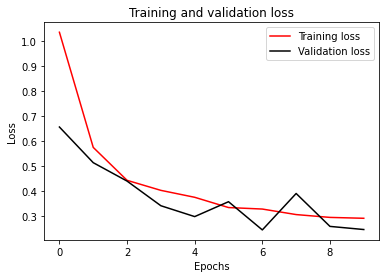

In [107]:
plt.plot(hist.history['loss'], color = 'r',label = 'Training loss')
plt.plot(hist.history['val_loss'], color = 'k',label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend()
plt.show()

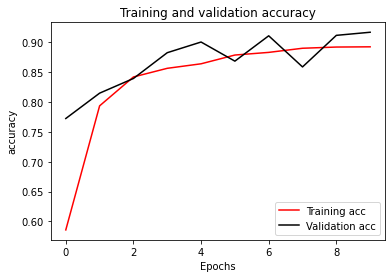

In [106]:
plt.plot(hist.history['accuracy'], color = 'r', label = 'Training acc')
plt.plot(hist.history['val_accuracy'], color = 'k',label = 'Validation acc')
plt.title('Training and validation accuracy', color='k')
plt.xlabel('Epochs')
plt.ylabel("accuracy")
plt.legend()
plt.show()

C:\Users\Hesham\AppData\Local\Temp/ipykernel_18188/3902924419.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = classifier.predict_generator(test_batches)


Confusion Matrix
[[28 30 33 55 45 19]
 [38 20 30 51 34 25]
 [24 31 31 47 32 23]
 [35 49 43 86 54 29]
 [40 39 37 63 61 36]
 [25 26 30 58 37 25]]
classification_Report
              precision    recall  f1-score   support

       f_app       0.15      0.13      0.14       210
       f_ban       0.10      0.10      0.10       198
       f_ora       0.15      0.16      0.16       188
       r_app       0.24      0.29      0.26       296
       r_ban       0.23      0.22      0.23       276
       r_ora       0.16      0.12      0.14       201

    accuracy                           0.18      1369
   macro avg       0.17      0.17      0.17      1369
weighted avg       0.18      0.18      0.18      1369



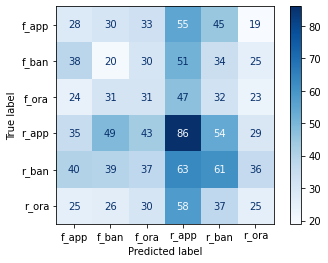

In [255]:
# Confusion Matrix  & Pres  & Recall   & F1-Score

target_names = ['f_app', 'f_ban', 'f_ora', 'r_app', 'r_ban', 'r_ora']
#target_names = ['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']

labels_name = [0, 1, 2, 3, 4, 5]

y_pred = classifier.predict_generator(test_batches)
x_pred = np.argmax(y_pred, axis = 1) #to Max predict

#cm = confusion matrix
cm = confusion_matrix(test_batches.classes, x_pred, labels = labels_name)
print('Confusion Matrix')
print(confusion_matrix(test_batches.classes, x_pred))

print('classification_Report')
print(classification_report(test_batches.classes, x_pred, target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues, values_format = 'g')
plt.show()

In [209]:
path = 'C:\\Users\Hesham\\Desktop\\data divided\\test\\freshbanana'

#C:\\Users\Hesham\\Desktop\\data divided\\test\\freshapples

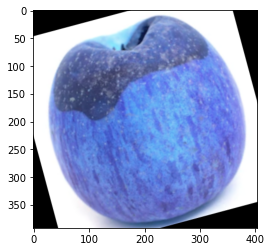

In [212]:
img_arr = cv2.imread(test_path)
plt.imshow(img_arr)

In [236]:
test_path = 'C:\\Users\\Hesham\\Desktop\\data divided\\test\\\freshoranges\\saltandpepper_Screen Shot 2018-06-12 at 11.50.14 PM.png'
#C:\\Users\\Hesham\\Desktop\\data divided\\train\\rottenapples\\rotated_by_15_Screen Shot 2018-06-07 at 2.23.24 PM.png

In [237]:
paths = [os.path.join(path,s) for s in os.listdir(path)]

In [238]:
print(len(paths))

198


In [239]:
print(paths[1])

C:\Users\Hesham\Desktop\data divided\test\freshbanana\rotated_by_15_Screen Shot 2018-06-12 at 10.08.01 PM.png


In [240]:
img=cv2.imread(paths[1])

In [241]:
img_arr = plt.imread(paths[1])
img = cv2.resize(img_arr, (224, 224))
img = np.expand_dims(img, axis=0)
img = img/255

fresh banana


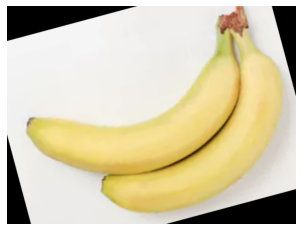

In [242]:
pred = classifier.predict(img)
plt.imshow(img_arr)
plt.axis('off')
print(labels[np.argmax(pred)])